In [57]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataframe
df = pd.read_excel("C:/Users/ACN/Desktop/Online Retail analysis(python)/online_retail_II.xlsx")
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [59]:
#Remove missing customer IDs
df = df.dropna(subset=["Customer ID"])

#Remove negative or zero quantities
df = df[df["Quantity"] > 0]

#Remove zero or negative prices
df = df[df["Price"] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [60]:
df["Revenue"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [61]:
total_revenue = df["Revenue"].sum()
total_orders = df["Invoice"].nunique()
total_customers = df["Customer ID"].nunique()

print(f"Total Revenue:   ${total_revenue:,.2f}")
print(f"Total Orders:    {total_orders:,}")
print(f"Total Customers: {total_customers:,}")

Total Revenue:   $8,832,003.27
Total Orders:    19,213
Total Customers: 4,312


In [62]:
top_products = (
    df.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
)

print(top_products)


Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Revenue, dtype: float64


<Axes: title={'center': 'Top 10 Products by Revenue'}, ylabel='Description'>

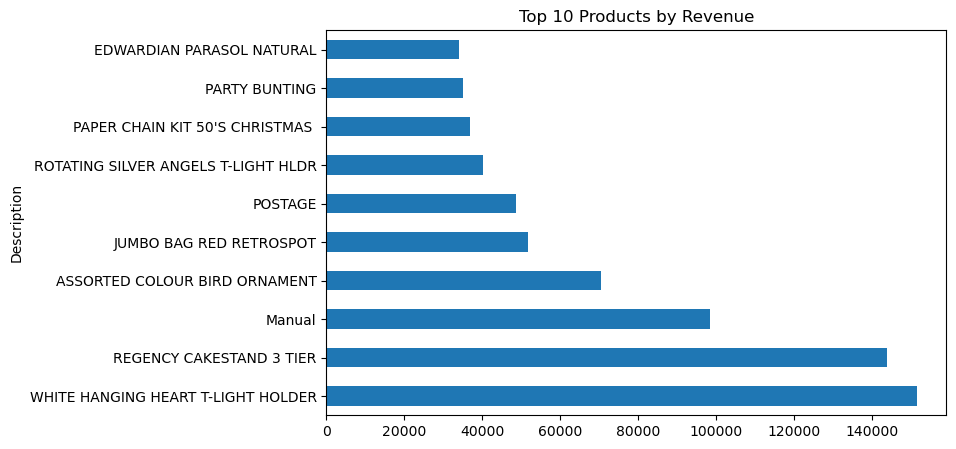

In [63]:
top_products.plot(kind="barh", figsize=(8,5), title="Top 10 Products by Revenue")


InvoiceDate
2009-12-31      $686,654.16
2010-01-31      $557,319.06
2010-02-28      $506,371.07
2010-03-31      $699,608.99
2010-04-30      $594,609.19
2010-05-31      $599,985.79
2010-06-30      $639,066.58
2010-07-31      $591,636.74
2010-08-31      $604,242.65
2010-09-30      $831,615.00
2010-10-31    $1,036,680.00
2010-11-30    $1,172,336.04
2010-12-31      $311,878.00
Freq: ME, Name: Revenue, dtype: object


Text(2010-12-01, 200000, 'Incomplete Data')

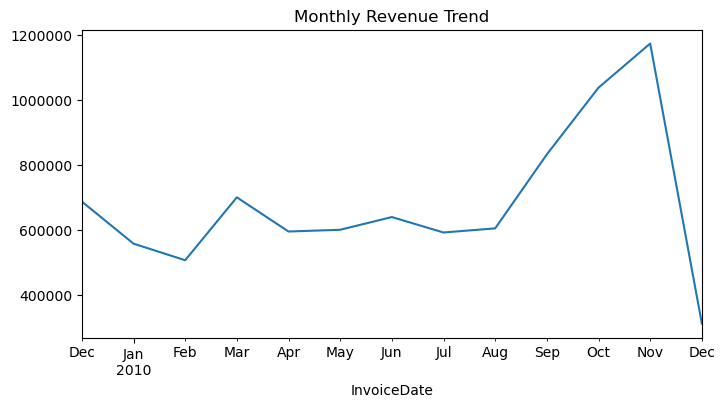

In [104]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

monthly_sales = (
    df.set_index("InvoiceDate")
      .resample("ME")["Revenue"]
      .sum()
)
print(monthly_sales.map("${:,.2f}".format))

monthly_sales.plot(figsize=(8,4), title="Monthly Revenue Trend")
plt.ticklabel_format(style='plain', axis='y')
plt.annotate('Incomplete Data', xy=('2010-12-01', 200000), color='red')

In [99]:
top_customers = (
    df.groupby("Customer ID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_customers.map("${:,.2f}".format))


Customer ID
18102.0    $349,164.35
14646.0    $248,396.50
14156.0    $196,566.74
14911.0    $152,147.57
13694.0    $131,443.19
17511.0     $84,541.17
15061.0     $83,284.38
16684.0     $80,489.21
16754.0     $65,500.07
17949.0     $60,117.60
Name: Revenue, dtype: object
